Task 2: You suspect some EVs have unusually high or low energy consumption. Find the
outliers in the mean - Energy consumption [kWh/100 km] column.(16 Marks)

In [1]:
import pandas as pd

In [2]:
import scipy.stats as stats

In [3]:
data = pd.read_csv("FEV-data-Excel.xlsx - Auta elektryczne.csv")
data.head(10)

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85
5,Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,disc (front + rear),4WD,95.0,369,...,3130.0,565.0,5,5,20,210,615.0,4.5,150,27.20
6,BMW i3,BMW,i3,169700,170,250,disc (front + rear),2WD (rear),42.2,359,...,1730.0,440.0,4,5,19,160,260.0,8.1,50,13.10
7,BMW i3s,BMW,i3s,184200,184,270,disc (front + rear),2WD (rear),42.2,345,...,1730.0,440.0,4,5,20,160,260.0,6.9,50,14.30
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
9,Citroën ë-C4,Citroën,ë-C4,125000,136,260,disc (front + rear),2WD (front),50.0,350,...,2000.0,459.0,5,5,16,150,380.0,9.5,100,NaN


In [4]:
ev_data = data.copy()

In [5]:
ev_data = ev_data.dropna(subset=['mean - Energy consumption [kWh/100 km]'])

In [6]:
ev_data['Z-score'] = stats.zscore(ev_data['mean - Energy consumption [kWh/100 km]'])
ev_data.tail()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km],Z-score
48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,179990,204,310,disc (front) + drum (rear),2WD (rear),77.0,549,...,412.0,5,5,19,160,385.0,7.9,125,15.9,-0.708446
49,Volkswagen ID.4 1st,Volkswagen,ID.4 1st,202390,204,310,disc (front) + drum (rear),2WD (rear),77.0,500,...,661.0,5,5,20,160,543.0,8.5,125,18.0,-0.227650
50,Citroën ë-Spacetourer (M),Citroën,ë-Spacetourer (M),215400,136,260,disc (front + rear),2WD (front),50.0,230,...,1056.0,8,5,16,130,603.0,13.1,100,25.2,1.420794
51,Mercedes-Benz EQV (long),Mercedes-Benz,EQV (long),339480,204,362,NaN,2WD (front),90.0,356,...,865.0,6,5,17,160,NaN,NaN,110,28.2,2.107645
52,Nissan e-NV200 evalia,Nissan,e-NV200 evalia,164328,109,254,disc (front + rear),2WD (front),40.0,200,...,658.0,5,5,15,123,870.0,NaN,50,25.9,1.581059


Finding the z-score of all the cars and considering z-score>2 will cover 95% of the cases so the 
outliers should be outside this range.

In [7]:
outliers = ev_data[abs(ev_data['Z-score']>2)]
outliers

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km],Z-score
51,Mercedes-Benz EQV (long),Mercedes-Benz,EQV (long),339480,204,362,NaN,2WD (front),90.0,356,...,865.0,6,5,17,160,NaN,NaN,110,28.2,2.107645


Methodology:

    Used the Z-score method to identify outliers in the Mean - Energy consumption [kWh/100 km] column.
    Considered values with Z-score > 2 as potential outliers.


Observation:

    Only one EV named- "Mercedes-Benz EQV (long)" from car maker "Mercedes-Benz" was identified as an outlier.
    This EV has an unusually high energy consumption, significantly deviating from the average/mean.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

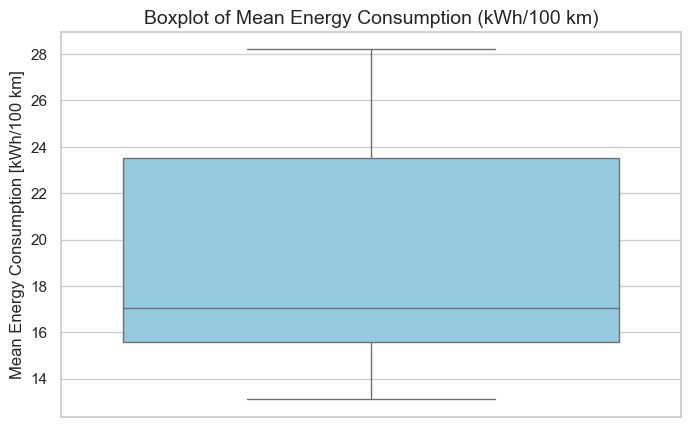

In [9]:
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=ev_data['mean - Energy consumption [kWh/100 km]'], color='skyblue')

# Add title and labels
plt.title('Boxplot of Mean Energy Consumption (kWh/100 km)', fontsize=14)
plt.ylabel('Mean Energy Consumption [kWh/100 km]', fontsize=12)

# Show the plot
plt.show()